# <font color='red'>Clustering Assignment</font>

**There will be some functions that start with the word "grader" ex: grader_actors(), grader_movies(), grader_cost1() etc, you should not change those function definition.<br><br>Every Grader function has to return True.**

**Please check [clustering assignment helper functions](https://drive.google.com/file/d/1V29KhKo3YnckMX32treEgdtH5r90DIjU/view?usp=sharing) notebook before attempting this assignment.**

*  Read graph from the given <font color='blue'>movie_actor_network.csv</font> (note that the graph is bipartite graph.)

*  Using stellergaph and gensim packages, get the dense representation(128dimensional vector) of every node in the graph. [Refer <font color='blue'>Clustering_Assignment_Reference.ipynb</font>]

* Split the dense representation into actor nodes, movies nodes.(Write you code in <font color='blue'>def data_split()</font>)


# <font color='red'>Task 1 : Apply clustering algorithm to group similar actors</font>

 1. For this task consider only the actor nodes 
 2. Apply any clustering algorithm of your choice <br>
    Refer : https://scikit-learn.org/stable/modules/clustering.html
 3. Choose the number of clusters for which you have maximum score of <b>$Cost1*Cost2$</b><br>
 4. Cost1 = $\frac{1}{N}\sum_{\text{each cluster i}}  \frac{\text{(number of nodes in the largest connected component in the graph with the actor nodes and its movie neighbours in cluster i)}}{\text{(total number of nodes in that cluster i)}}$ where N= number of clusters 
<br> (Write your code in <font color='blue'>def cost1()</font>)<br>
 5. Cost2 = $\frac{1}{N}\sum_{\text{each cluster i}}  \frac{\text{(sum of degress of actor nodes in the graph with the actor nodes and its movie neighbours in cluster i)}}{\text{(number of unique movie nodes in the graph with the actor nodes and its movie neighbours in cluster i)}}$ where N= number of clusters 
 <br> (Write your code in <font color='blue'>def cost2()</font>)<br>
 6. Fit the clustering algorithm with the opimal number_of_clusters and get the cluster number for each node <br>
 7. Convert the d-dimensional dense vectors of nodes into 2-dimensional using dimensionality reduction techniques (preferably TSNE)<br>
 8. Plot the 2d scatter plot, with the node vectors after step e and give colors to nodes such that same cluster nodes will have same color

<img src='https://i.imgur.com/4SPYPFa.jpg'>

# <font color='red'>Task 2 : Apply clustering algorithm to group similar movies</font>


1. For this task consider only the movie nodes
2. Apply any clustering algorithm of your choice
3.Choose the number of clusters for which you have maximum score of $Cost1*Cost2$ <br>

    Cost1 = $\frac{1}{N}\sum_{\text{each cluster i}}  \frac{\text{(number of nodes in the largest connected component in the graph with the movie nodes and its actor neighbours in cluster i)}}{\text{(total number of nodes in that cluster i)}}$ where N= number of clusters <br>
(Write your code in <font color='blue'>def cost1()</font>)<br>
	
4. Cost2 = $\frac{1}{N}\sum_{\text{each cluster i}}  \frac{\text{(sum of degress of movie nodes in the graph with the movie nodes and its actor neighbours in cluster i)}}{\text{(number of unique actor nodes in the graph with the movie nodes and its actor neighbours in cluster i)}}$ 
where N= number of clusters 
<br>(Write your code in <font color='blue'>def cost2()</font>)<br>


**Algorithm for actor nodes**

<pre>
	for number_of_clusters in [3, 5, 10, 30, 50, 100, 200, 500]:
		algo = clustering_algorith(clusters=number_of_clusters)
        # you will be passing a matrix of size N*d where N number of actor nodes and d is dimension from gensim
		algo.fit(the dense vectors of actor nodes) 
        You can get the labels for corresponding actor nodes (algo.labels_)
        Create a graph for every cluster(ie., if n_clusters=3, create 3 graphs)
        (You can use ego_graph to create subgraph from the actual graph)
        compute cost1,cost2 
           (if n_cluster=3, cost1=cost1(graph1)+cost1(graph2)+cost1(graph3) # here we are doing summation
            cost2=cost2(graph1)+cost2(graph2)+cost2(graph3)
		computer the metric Cost = Cost1*Cost2
	return number_of_clusters which have maximum Cost
	</pre>

In [1]:
!pip install pynput

     |████████████████████████████████| 92kB 3.3MB/s 
     |████████████████████████████████| 184kB 5.7MB/s 


In [2]:
!pip install stellargraph

     |████████████████████████████████| 419kB 4.7MB/s 


In [3]:
!pip install networkx==2.3

     |████████████████████████████████| 1.8MB 4.6MB/s 
  Created wheel for networkx: filename=networkx-2.3-py2.py3-none-any.whl size=1556408 sha256=9027a8fffc8d65f60e1710a381e703bfd52d262955bffbcf51ed690253f1678d
  Stored in directory: /root/.cache/pip/wheels/de/63/64/3699be2a9d0ccdb37c7f16329acf3863fd76eda58c39c737af
Successfully built networkx
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: networkx 2.4
    Uninstalling networkx-2.4:
      Successfully uninstalled networkx-2.4


In [0]:
import networkx as nx
from networkx.algorithms import bipartite
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
# you need to have tensorflow 
from stellargraph.data import UniformRandomMetaPathWalk
from stellargraph import StellarGraph

In [0]:
data=pd.read_csv('movie_actor_network.csv', index_col=False, names=['movie','actor'])

In [0]:
edges = [tuple(x) for x in data.values.tolist()]

In [0]:
B = nx.Graph()
B.add_nodes_from(data['movie'].unique(), bipartite=0, label='movie')
B.add_nodes_from(data['actor'].unique(), bipartite=1, label='actor')
B.add_edges_from(edges, label='acted')

In [0]:
A = list(nx.connected_component_subgraphs(B))[0]

In [9]:
print("number of nodes", A.number_of_nodes())
print("number of edges", A.number_of_edges())

number of nodes 4703
number of edges 9650


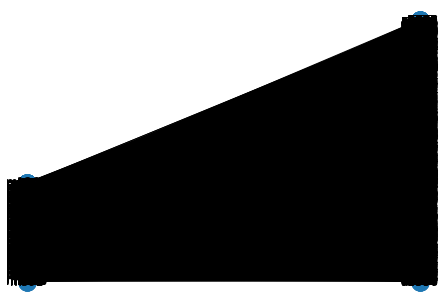

In [10]:
l, r = nx.bipartite.sets(A)
pos = {}

pos.update((node, (1, index)) for index, node in enumerate(l))
pos.update((node, (2, index)) for index, node in enumerate(r))
  
nx.draw(A, pos=pos, with_labels=True)
plt.show()

In [11]:
movies = []
actors = []
for i in A.nodes():
    if 'm' in i:
        movies.append(i)
    if 'a' in i:
        actors.append(i)
print('number of movies ', len(movies))
print('number of actors ', len(actors))

number of movies  1292
number of actors  3411


In [12]:

# Create the random walker
rw = UniformRandomMetaPathWalk(StellarGraph(A))

# specify the metapath schemas as a list of lists of node types.
metapaths = [
    ["movie", "actor", "movie"],
    ["actor", "movie", "actor"]
]

walks = rw.run(nodes=list(A.nodes()), # root nodes
               length=100,  # maximum length of a random walk
               n=1,        # number of random walks per root node 
               metapaths=metapaths
              )

print("Number of random walks: {}".format(len(walks)))

Number of random walks: 4703


In [0]:
from gensim.models import Word2Vec
model = Word2Vec(walks, size=128, window=5)

In [14]:
model.wv.vectors.shape  # 128-dimensional vector for each node in the graph

(4703, 128)

In [0]:
# Retrieve node embeddings and corresponding subjects
node_ids = model.wv.index2word  # list of node IDs
node_embeddings = model.wv.vectors  # numpy.ndarray of size number of nodes times embeddings dimensionality
node_targets = [ A.node[node_id]['label'] for node_id in node_ids]

In [16]:
print(len(node_targets[1]))
print(len(node_embeddings))

5
4703


In [17]:
type(node_targets[11])

str

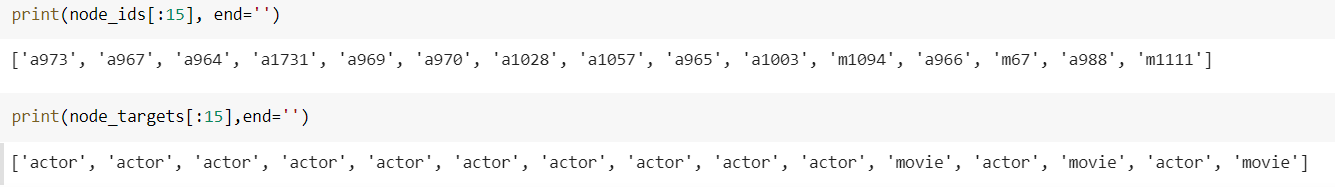

In [0]:
def data_split(node_ids,node_targets,node_embeddings):
    '''In this function, we will split the node embeddings into actor_embeddings , movie_embeddings '''
    actor_nodes,movie_nodes=[],[]
    actor_embeddings,movie_embeddings=[],[]
    for i in range(0,4703):

      if node_targets[i]=='actor':
        actor_embeddings.append(node_embeddings[i])
        actor_nodes.append(node_ids[i])
      elif  node_targets[i]=='movie' :
        movie_embeddings.append(node_embeddings[i])
        movie_nodes.append(node_ids[i])



    # split the node_embeddings into actor_embeddings,movie_embeddings based on node_ids
    # By using node_embedding and node_targets, we can extract actor_embedding and movie embedding
    # By using node_ids and node_targets, we can extract actor_nodes and movie nodes

    return actor_nodes,movie_nodes,actor_embeddings,movie_embeddings


In [0]:
actor_nodes,movie_nodes,actor_embeddings,movie_embeddings=data_split(node_ids,node_targets,node_embeddings)

<font color='cyan'>Graded function - 1</font>

In [20]:
def grader_actors(data):
    assert(len(data)==3411)
    return True
grader_actors(actor_nodes)

True

<font color='cyan'>Graded function - 2</font>

In [21]:
def grader_movies(data):
    assert(len(data)==1292)
    return True
grader_movies(movie_nodes)

True

<font color='blue'>Calculating cost1</font>

Cost1 = $\frac{1}{N}\sum_{\text{each cluster i}}  \frac{\text{(number of nodes in the largest connected component in the graph with the actor nodes and its movie neighbours in cluster i)}}{\text{(total number of nodes in that cluster i)}}$ where N= number of clusters <br><br>
<br>

In [0]:
def cost1(graph,number_of_clusters):
    '''In this function, we will calculate cost1'''
    cost1=(1/number_of_clusters)*(len(max(nx.connected_component_subgraphs(graph), key=len))/(graph.number_of_nodes()))
    return cost1

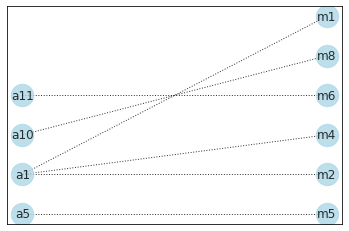

In [42]:
import networkx as nx
from networkx.algorithms import bipartite
graded_graph= nx.Graph()
graded_graph.add_nodes_from(['a1','a5','a10','a11'], bipartite=0) # Add the node attribute "bipartite"
graded_graph.add_nodes_from(['m1','m2','m4','m6','m5','m8'], bipartite=1)
graded_graph.add_edges_from([('a1','m1'),('a1','m2'),('a1','m4'),('a11','m6'),('a5','m5'),('a10','m8')])
l={'a1','a5','a10','a11'};r={'m1','m2','m4','m6','m5','m8'}
pos = {}
pos.update((node, (1, index)) for index, node in enumerate(l))
pos.update((node, (2, index)) for index, node in enumerate(r))
nx.draw_networkx(graded_graph, pos=pos, with_labels=True,node_color='lightblue',alpha=0.8,style='dotted',node_size=500)

<font color='cyan'>Graded function - 3</font>

In [43]:
graded_cost1=cost1(graded_graph,3)
def grader_cost1(data):
    assert(data==((1/3)*(4/10))) # 1/3 is number of clusters
    return True
grader_cost1(graded_cost1)

True

<font color='blue'>Calculating cost2</font>

Cost2 = $\frac{1}{N}\sum_{\text{each cluster i}}  \frac{\text{(sum of degress of actor nodes in the graph with the actor nodes and its movie neighbours in cluster i)}}{\text{(number of unique movie nodes in the graph with the actor nodes and its movie neighbours in cluster i)}}$ where N= number of clusters 

In [0]:
def cost2(graph,number_of_clusters):
    '''In this function, we will calculate cost1'''
    cont=[]
    for i in graph.nodes():
      if 'm' in i:
         cont.append(i)
    cost2=(1/number_of_clusters)*(graph.number_of_edges()/len(cont))
    
    return cost2

In [45]:
graded_cost2=cost2(graded_graph,3)
def grader_cost2(data):
    assert(data==((1/3)*(6/6))) # 1/3 is number of clusters
    return True
grader_cost2(graded_cost2)

True

<font color='blue'>Grouping similar actors</font>

In [46]:
matrics_cost=0
for k in [3, 5, 10,15,18,25,50,120]:
  algo = KMeans(n_clusters=k,init='k-means++', random_state=0)
  algo.fit(actor_embeddings) 
  clusture_no_for_every_datapoint=algo.labels_
  unique_clusture_no = np.unique(clusture_no_for_every_datapoint)
  dict_actor_nodes=dict(zip(actor_nodes,clusture_no_for_every_datapoint)) 
  k_no_of_cluster=[]
  for n in unique_clusture_no:
      clusture=[]
      for actor_node,clusture_no in dict_actor_nodes.items():
        if clusture_no==n:
          clusture.append(actor_node)
      k_no_of_cluster.append(clusture)
  cost1_new=0
  cost2_new=0   
  for every_cluster in k_no_of_cluster:
    new= nx.Graph()
    for node_in_cluster  in every_cluster:
      ego = nx.ego_graph(B,node_in_cluster)
      new.add_nodes_from(ego.nodes())
      new.add_edges_from(ego.edges())
    temp1=cost1(new,k)
    temp2=cost2(new,k)
    cost1_new=cost1_new+temp1
    cost2_new=cost2_new+temp2
  matrics_cost=cost1_new*cost2_new
  print("for k = ",k, "matric_cost = ",matrics_cost)  




for k =  3 matric_cost =  3.8176562439630652
for k =  5 matric_cost =  3.1119483680181865
for k =  10 matric_cost =  2.2580616101021693
for k =  15 matric_cost =  2.0196895329388904
for k =  18 matric_cost =  1.9444747154866706
for k =  25 matric_cost =  1.7724891851426308
for k =  50 matric_cost =  1.5408944319606732
for k =  120 matric_cost =  1.6782105987944902



<font color='blue'>Displaying similar actor clusters</font>

In [0]:

#https://www.kaggle.com/aussie84/clustering-with-kmeans-pca-tsne
algo = KMeans(n_clusters=3,init='k-means++', random_state=0)
algo.fit(actor_embeddings) 
clusture_no_for_every_datapoint= algo.fit_predict(actor_embeddings)

In [0]:
actor_labels = pd.DataFrame(actor_embeddings)
actor_labels['cluster'] = clusture_no_for_every_datapoint

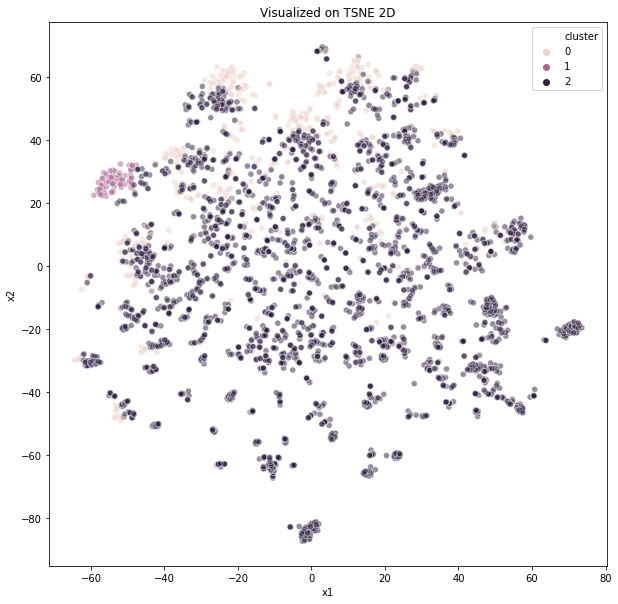

In [49]:
import seaborn as sns
from sklearn.manifold import TSNE
X = actor_labels.iloc[:,:-1]
Xtsne = TSNE(n_components=2).fit_transform(X)
dftsne = pd.DataFrame(Xtsne)
dftsne['cluster'] = clusture_no_for_every_datapoint
dftsne.columns = ['x1','x2','cluster']
plt.figure(figsize=(10,10))
sns.scatterplot(data=dftsne,x='x1',y='x2',hue='cluster',legend="full",alpha=0.5,).set_title('Visualized on TSNE 2D')
plt.show()

<font color='blue'>Grouping similar movies</font>

In [0]:
def cost1(graph,number_of_clusters):
    '''In this function, we will calculate cost1'''
    cost1=(1/number_of_clusters)*(len(max(nx.connected_component_subgraphs(graph), key=len))/(graph.number_of_nodes()))
    return cost1

In [0]:
def cost2(graph,number_of_clusters):
    '''In this function, we will calculate cost1'''
    cont=[]
    for i in graph.nodes():
      if 'a' in i:
         cont.append(i)
    cost2=(1/number_of_clusters)*(graph.number_of_edges()/len(cont))
    
    return cost2

In [52]:
matrics_cost=0
for k in [3, 5, 10,15,18,25,50,120]:
  algo = KMeans(n_clusters=k,init='k-means++', random_state=0)
  algo.fit(movie_embeddings) 
  clusture_no_for_every_datapoint=algo.labels_
  unique_clusture_no = np.unique(clusture_no_for_every_datapoint)
  dict_movie_nodes=dict(zip(movie_nodes,clusture_no_for_every_datapoint)) 
  k_no_of_cluster=[]
  for n in unique_clusture_no:
      clusture=[]
      for movie_node,clusture_no in dict_movie_nodes.items():
        if clusture_no==n:
          clusture.append(movie_node)
      k_no_of_cluster.append(clusture)
  cost1_new=0
  cost2_new=0   
  for every_cluster in k_no_of_cluster:
    new= nx.Graph()
    for node_in_cluster  in every_cluster:
      ego = nx.ego_graph(B,node_in_cluster)
      new.add_nodes_from(ego.nodes())
      new.add_edges_from(ego.edges())
    temp1=cost1(new,k)
    temp2=cost2(new,k)
    cost1_new=cost1_new+temp1
    cost2_new=cost2_new+temp2
  matrics_cost=cost1_new*cost2_new
  print("for k = ",k, "matric_cost = ",matrics_cost)  




for k =  3 matric_cost =  2.7411597198287625
for k =  5 matric_cost =  2.621507378052418
for k =  10 matric_cost =  2.072028966046183
for k =  15 matric_cost =  2.418753176778979
for k =  18 matric_cost =  2.371243298961502
for k =  25 matric_cost =  2.1240471260932927
for k =  50 matric_cost =  1.903053418897081
for k =  120 matric_cost =  1.5207020626611851


<font color='blue'>Displaying similar movie clusters</font>

In [0]:
algo = KMeans(n_clusters=3,init='k-means++', random_state=0)
algo.fit(actor_embeddings) 
clusture_no_for_every_datapoint= algo.fit_predict(movie_embeddings)

In [0]:
actor_labels = pd.DataFrame(movie_embeddings)
actor_labels['cluster'] = clusture_no_for_every_datapoint

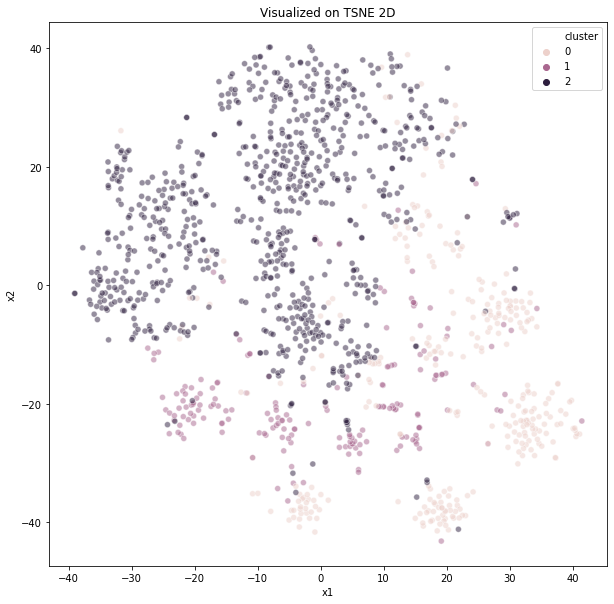

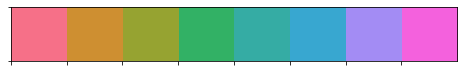

In [55]:
import seaborn as sns
from sklearn.manifold import TSNE
X = actor_labels.iloc[:,:-1]
Xtsne = TSNE(n_components=2).fit_transform(X)
dftsne = pd.DataFrame(Xtsne)
dftsne['cluster'] = clusture_no_for_every_datapoint
dftsne.columns = ['x1','x2','cluster']
plt.figure(figsize=(10,10))
sns.scatterplot(data=dftsne,x='x1',y='x2',hue='cluster',legend="full",alpha=0.5,).set_title('Visualized on TSNE 2D')
sns.palplot(sns.color_palette("husl", 8))
plt.show()